# Explore different submissions yet

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

## Import different results

In [2]:
LB031199 = pd.read_csv('xgb_0.95label.csv')['price_doc']
LB032269 = pd.read_csv('xgb_0.95label_all_feature_data_clean.csv')['price_doc']
LB031743 = pd.read_csv('xgb_0.95label_tsne.csv')['price_doc']
LB031671 = pd.read_csv('xgb_0.95label_tsne_kremlin_others.csv')['price_doc']
LB031932 = pd.read_csv('xgb_0.95label_tsne_kremlin_others_macro_feature.csv')['price_doc']
LB033258 = pd.read_csv('xgb_0.95label_tsne_kremlin_others_macro_intresection.csv')['price_doc']
LB031638 = pd.read_csv('xgb_0.95label_tsne_kremlin_others_param_tuning.csv')['price_doc']
LB031340 = pd.read_csv('Submission_xgb2.csv')['price_doc']
LB035899 = pd.read_csv('xgb_0.95label_all_feature_data_clean_interactive.csv')['price_doc']

In [3]:
id_ = pd.read_csv('xgb_0.95label.csv')['id']

In [4]:
All_result = pd.DataFrame({'id':id_,'LB035899':LB035899,'LB031340':LB031340,'LB03119':LB031199,'LB032269':LB032269,'LB031743':LB031743,'LB031671':LB031671,'LB031932':LB031932,'LB033258':LB033258,'LB031638':LB031638})

In [5]:
result_list = [LB031340,LB032269,LB031743,LB031671,LB031932,LB033258,LB031638,LB035899]
LB_Score = [0.31340,0.32269,0.31743,0.31671,0.31932,0.33258,0.31638,0.35899]

## Mark first one as bench mark and see 

In [6]:
def mean_error(line1,line2):
    error = [x-y for x,y in zip(line1,line2)]
    return np.mean(error)

In [7]:
Gap = []
ME = []
for x,y in zip(LB_Score,result_list):
    lb_gap = x-0.31199
    me = mean_error(LB031199,y)
    Gap.append(lb_gap)
    ME.append(me)
    print(str(x)+': '+str(me))

0.3134: -370530.339973
0.32269: -410520.329924
0.31743: -2959.02231793
0.31671: -4354.26974028
0.31932: -228726.386975
0.33258: -846951.974533
0.31638: 3272.37563626
0.35899: -881246.127814


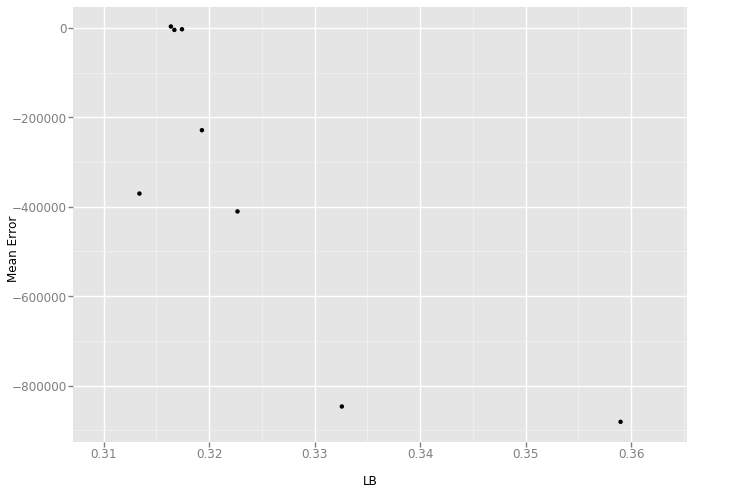

<ggplot: (-9223363280057636436)>


In [79]:
ME_Result = pd.DataFrame({'LB':LB_Score,'Mean Error':ME})
p = ggplot(aes(x='LB',y='Mean Error'),ME_Result) + geom_point()
print(p)

One result shows a ME more than 0. Others: less than 0. And worse LB Score is, smaller the ME value is.

## Check Proportion of values that less than benchmark in each submission

This may be **redundant** , but we better double check it before ensemble.

In [38]:
def Count_less_values(Sub):
    lst = [1 if x<y else 0 for x,y in zip(LB031199,Sub)]
    return sum(lst)/len(id_)

In [88]:
Proportion = []
for x,y in zip(LB_Score,result_list):
    proportion = Count_less_values(y)
    Proportion.append(proportion)
    print(str(x)+': '+str(proportion))

0.3134: 0.9980422866092404
0.32269: 0.8580005220569042
0.31743: 0.4930827460193161
0.31671: 0.48629600626468283
0.31932: 0.738971547898721
0.33258: 0.9279561472200469
0.31638: 0.5117462803445576
0.35899: 0.7783868441660141


LB 0.3134 Uses the same features as the baseline submission, so the trend of predicted values should be the same as the best model with linear modification.

In [104]:
ME_Result['pro_less'] = Proportion

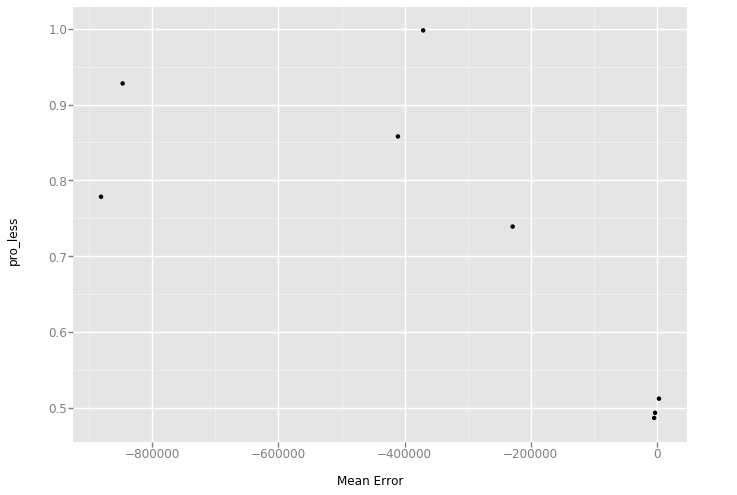

<ggplot: (8756797187020)>


In [105]:
g = ggplot(ME_Result,aes(x='Mean Error',y='pro_less')) + geom_point()
print(g)

## Define Weighted Averaged Ensemble Model

In [74]:
prediction = pd.DataFrame({'Pred1':LB031199,'Pred2':LB031340})
weights = [0.8,0.2] 
final_predictions = []
for row_number in range(len(prediction)):
    weighted_1 = prediction.iloc[row_number,0]*weights[0]
    weighted_2 = prediction.iloc[row_number,1]*weights[1]
    final_predictions.append(
        weighted_1+weighted_2
    )

In [75]:
mean_error(LB031199,final_predictions)

-74106.067994649304

In [102]:
mean_error(LB031199,final_predictions)

-111159.10199197299

In [103]:
sub = pd.DataFrame({'id':id_,'price_doc':final_predictions})
sub.to_csv('0.70.3TwoBestBaseModelTogether.csv',index=False)

## Try: Stack LB031638/LB03119 with xgboost 

Two models use different sets of features. Also, the data points in model with result of 0.31638 are half above half below the data points in model 0.3119. So ensemble two models with different behavior may be a chocie.

In [113]:
Partial_Result = All_result[['id','LB031638']]
Partial_Result['LB031199'] = LB031199

/home/jiashen/env3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
forplot = pd.melt(Partial_Result,'id')

In [119]:
forplot.head()

,id,variable,value
0,30474,LB031638,5204277.0
1,30475,LB031638,7950616.0
2,30476,LB031638,5209930.5
3,30477,LB031638,5500044.0
4,30478,LB031638,4955046.0


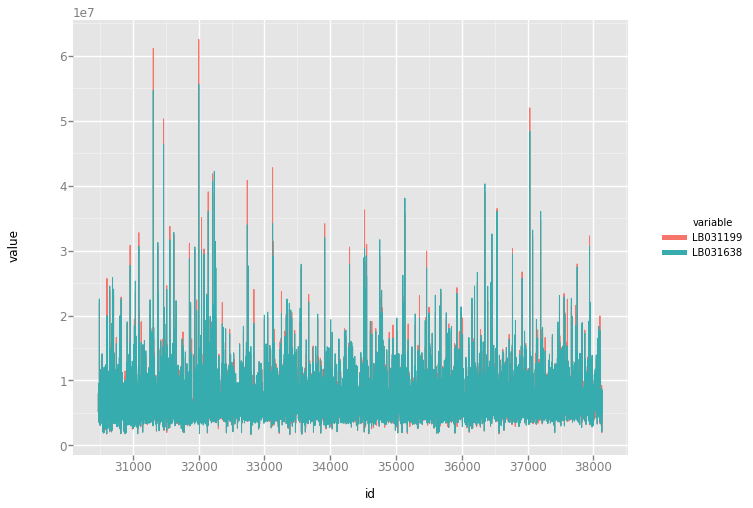

<ggplot: (-9223363280057692742)>


In [120]:
g = ggplot(forplot,aes(x = 'id',y='value',color = 'variable')) + geom_line()
print(g)

In [121]:
Partial_Result['Gap'] = Partial_Result['LB031199'] - Partial_Result['LB031638']

/home/jiashen/env3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


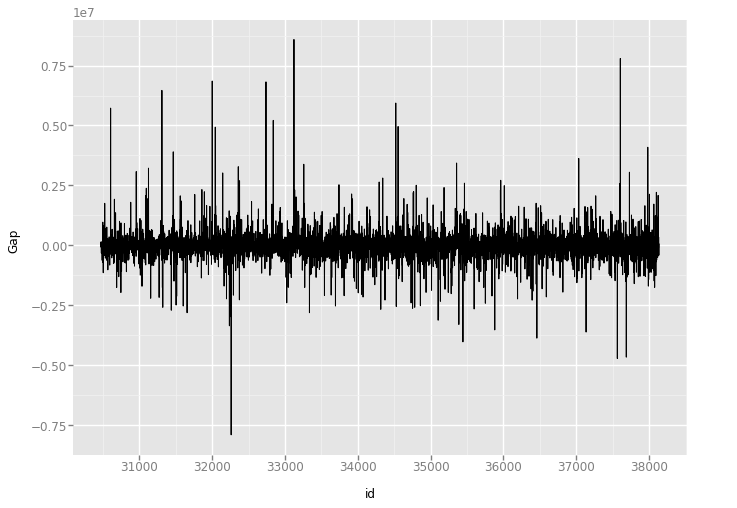

<ggplot: (8756797185870)>


In [122]:
g = ggplot(Partial_Result,aes(x = 'id',y='Gap')) + geom_line()
print(g)

Quite different model results.

**Model 1**

In [3]:
import xgboost as xgb

/home/jiashen/env3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train_1 = pd.read_csv('train_c.csv')
test_1 = pd.read_csv('test_c.csv')

In [9]:
col = list(test_1.columns)[2:]
label = train_1['price_doc']*0.95+10
dtrain1 = xgb.DMatrix(train_1[col],label)
dtest1 = xgb.DMatrix(test_1[col])

In [10]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [11]:
model1 = xgb.train(params,dtrain1,num_boost_round= 372)
model1_pred = model1.predict(dtrain1)

**Model 2**

In [12]:
train_2 = pd.read_csv('train_c.csv')
test_2 = pd.read_csv('test_c.csv')
tsne_results = np.load('tsne_all.npy')
train_2['tsne_1'] = tsne_results[:train_2.shape[0],0]
train_2['tsne_2'] = tsne_results[:train_2.shape[0],1]
test_2['tsne_1'] = tsne_results[train_2.shape[0]:,0]
test_2['tsne_2'] = tsne_results[train_2.shape[0]:,1]

In [13]:
df_kremlin = pd.read_csv('subarea_from_kremlin.csv')
df_kremlin = df_kremlin[['sub_area', 'distance_from_kremlin']]

In [14]:
train_raw = pd.read_csv('train_c.csv')
test_raw = pd.read_csv('test_c.csv')
train_raw = pd.merge(train_raw, df_kremlin,how='left', on='sub_area')
test_raw = pd.merge(test_raw, df_kremlin,how='left', on='sub_area')
train_2['distance_from_kremlin'] = train_raw['distance_from_kremlin']
test_2['distance_from_kremlin'] = test_raw['distance_from_kremlin']

In [15]:
params2 = {
    'eta': 0.04, ## Try 0.01,3,5
    'max_depth': 6,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [25]:
label = train_2['price_doc']*0.95+10 

In [26]:
col2 = list(test_2.columns)[2:]

In [31]:
dtrain2 = xgb.DMatrix(train_2[col2],label)
dtest2 = xgb.DMatrix(test_2[col2])

[0]	train-rmse:7.86317e+06	test-rmse:7.86708e+06
[50]	train-rmse:2.45471e+06	test-rmse:2.8905e+06
[100]	train-rmse:1.95916e+06	test-rmse:2.59536e+06
[150]	train-rmse:1.82781e+06	test-rmse:2.55389e+06
[200]	train-rmse:1.74549e+06	test-rmse:2.53516e+06
[250]	train-rmse:1.67353e+06	test-rmse:2.52459e+06
[300]	train-rmse:1.61178e+06	test-rmse:2.52063e+06
[350]	train-rmse:1.56047e+06	test-rmse:2.5174e+06
Performance does not improve from 370 rounds


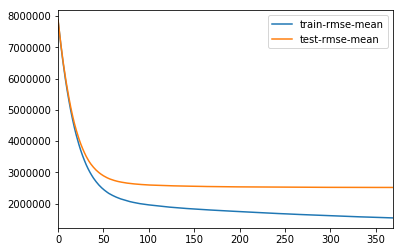

In [28]:
xgb_cvalid = xgb.cv(params2, dtrain2, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [29]:
model2 = xgb.train(params2,dtrain2,num_boost_round=len(xgb_cvalid))

In [40]:
model2_pred = model2.predict(dtrain2)

In [41]:
LB03168Repo = model2.predict(dtest2)

In [42]:
New_train = pd.DataFrame({'model1':model1_pred,'model2':model2_pred,'label':train_2['price_doc']*0.95+10 })

In [43]:
New_test = pd.DataFrame({'model1':LB031199,'model2':LB03168Repo})

In [64]:
params_new = {
    'eta': 0.04, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.5,
    'colsample_bytree': 1,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [65]:
dtrain_new = xgb.DMatrix(New_train[['model1','model2']],New_train['label'])
dtest_new = xgb.DMatrix(New_test)

[0]	train-rmse:7.84015e+06	test-rmse:7.84065e+06
[50]	train-rmse:1.86947e+06	test-rmse:1.9066e+06
[100]	train-rmse:1.51588e+06	test-rmse:1.57529e+06
[150]	train-rmse:1.48667e+06	test-rmse:1.56041e+06
[200]	train-rmse:1.47302e+06	test-rmse:1.55888e+06
Performance does not improve from 213 rounds


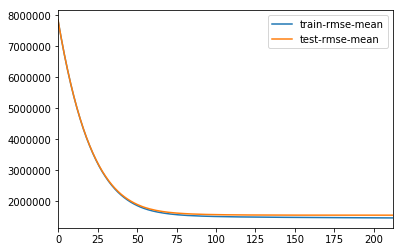

In [66]:
xgb_cvalid = xgb.cv(params_new, dtrain_new, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [67]:
Stack_model = xgb.train(params_new,dtrain_new,num_boost_round=len(xgb_cvalid))

In [68]:
Prediction = Stack_model.predict(dtest_new)

In [70]:
New_sub = pd.DataFrame({'id':id_,'price_doc':Prediction})
New_sub.to_csv('Stack03119and031638byxgboost.csv',index=False)

In [22]:
### Test a new way of weighted average
prediction = pd.DataFrame({'Pred1':LB031199,'Pred2':LB031340})
prediction['Final'] =  .6*prediction.Pred1 + .4*prediction.Pred2

In [23]:
sub = pd.DataFrame({'id':id_,'price_doc':prediction['Final']})

In [24]:
mean_error(LB031199,sub['price_doc'])

-148212.13598929785

In [26]:
sub.to_csv('WA0.60.4fortwobasemodels.csv',index=False)